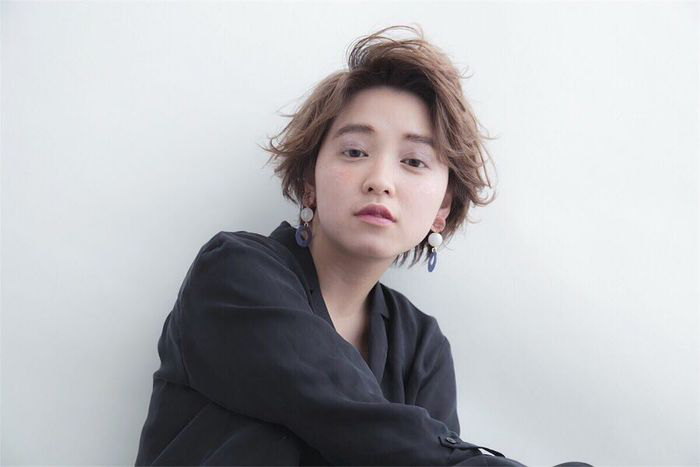

In [22]:
import requests
from PIL import Image

SUBSCRIPTION_KEY = 'c84e2ba318844114a092bab1eda8509b'
assert SUBSCRIPTION_KEY

face_api_url = 'https://20210212ishida.cognitiveservices.azure.com/face/v1.0/detect'

img = Image.open('sample01.jpg')
img

In [8]:
with open('sample01.jpg', 'rb') as f:
    binary_img = f.read()

# binary_img

headers = {
    'Content-Type': 'application/octet-stream',
    'Ocp-Apim-Subscription-Key': SUBSCRIPTION_KEY}

params = {
    'returnFaceId': 'true',
    'returnFaceAttributes': 'age,gender,headPose,smile,facialHair,glasses,emotion,hair,makeup,occlusion,accessories,blur,exposure,noise'
}

res = requests.post(face_api_url, params=params, headers=headers, data=binary_img)

In [9]:
res

<Response [200]>

In [11]:
result = res.json()
result

[{'faceId': '7c066aeb-6cfb-49ea-ad63-7c2faadec1eb',
  'faceRectangle': {'top': 122, 'left': 316, 'width': 126, 'height': 126},
  'faceAttributes': {'smile': 0.0,
   'headPose': {'pitch': 13.3, 'roll': 12.6, 'yaw': 1.3},
   'gender': 'female',
   'age': 21.0,
   'facialHair': {'moustache': 0.0, 'beard': 0.0, 'sideburns': 0.0},
   'glasses': 'NoGlasses',
   'emotion': {'anger': 0.0,
    'contempt': 0.001,
    'disgust': 0.0,
    'fear': 0.0,
    'happiness': 0.0,
    'neutral': 0.99,
    'sadness': 0.005,
    'surprise': 0.004},
   'blur': {'blurLevel': 'medium', 'value': 0.29},
   'exposure': {'exposureLevel': 'goodExposure', 'value': 0.74},
   'noise': {'noiseLevel': 'low', 'value': 0.26},
   'makeup': {'eyeMakeup': True, 'lipMakeup': True},
   'accessories': [],
   'occlusion': {'foreheadOccluded': False,
    'eyeOccluded': False,
    'mouthOccluded': False},
   'hair': {'bald': 0.02,
    'invisible': False,
    'hairColor': [{'color': 'brown', 'confidence': 1.0},
     {'color': 'red'

In [15]:
rect = result[0]['faceRectangle']
rect

{'top': 122, 'left': 316, 'width': 126, 'height': 126}

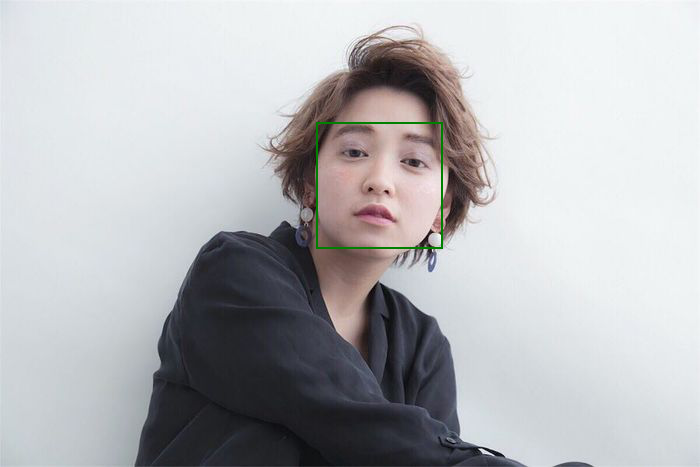

In [23]:
from PIL import ImageDraw
draw = ImageDraw.Draw(img)
draw.rectangle([(rect['left'], rect['top']), (rect['left']+rect['width'], rect['top']+rect['height'])], fill=None, outline='green', width=2)
img

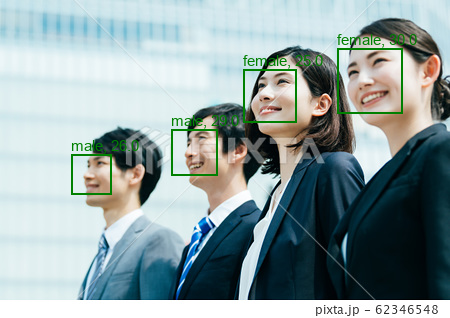

In [33]:
import requests
from PIL import Image
from PIL import ImageDraw, ImageFont
import io


SUBSCRIPTION_KEY = 'c84e2ba318844114a092bab1eda8509b'
assert SUBSCRIPTION_KEY

face_api_url = 'https://20210212ishida.cognitiveservices.azure.com/face/v1.0/detect'

img = Image.open('sample02.jpg')
with io.BytesIO() as output:
    img.save(output, format="JPEG")
    binary_img = output.getvalue()

headers = {
    'Content-Type': 'application/octet-stream',
    'Ocp-Apim-Subscription-Key': SUBSCRIPTION_KEY}

params = {
    'returnFaceId': 'true',
    'returnFaceAttributes': 'age,gender,headPose,smile,facialHair,glasses,emotion,hair,makeup,occlusion,accessories,blur,exposure,noise'
}

res = requests.post(face_api_url, params=params, headers=headers, data=binary_img)

results = res.json()
for result in results:
    rect = result['faceRectangle']
    gender = result['faceAttributes']['gender']
    age = result['faceAttributes']['age']
    text = gender
    text += ', '
    text += str(age)

    font = ImageFont.truetype("arial.ttf", 15)
    size = font.getsize(text)

    draw = ImageDraw.Draw(img)
    draw.rectangle([(rect['left'], rect['top']), (rect['left']+rect['width'], rect['top']+rect['height'])], fill=None, outline='green', width=2)
    draw.text((rect['left'], rect['top'] - size[1]), text, font=font, fill='green')
img

In [ ]:
import io
with io.BytesIO() as output:
    img.save(output, format="JPEG")
    binary_img = output.getvalue()